# Install packages

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

## pandas required to import data, sklearn functions required to build and evaluate KNN model

# Import data and data cleaning

In [6]:
df = pd.read_csv('data/LESAPeakArea.csv')
#importing data to datafram or df
print(df.head())
#to see structure of the data

                                            FileName       DesArea  \
0  TJP_240816_EDI_24m_AGED_622-9-2-B_16x10grid_GP...  220033.19230   
1  TJP_240816_EDI_24m_AGED_622-9-2-B_16x10grid_GP...       0.00000   
2  TJP_240816_EDI_24m_AGED_622-9-2-B_16x10grid_GP...       0.00000   
3  TJP_240816_EDI_24m_AGED_622-9-2-B_16x10grid_GP...   50214.28345   
4  TJP_240816_EDI_24m_AGED_622-9-2-B_16x10grid_GP...  150516.47850   

      DesD6Area      CholArea    CholD7Area     24SHCArea  24R_S_HCD7Area  \
0  109426.99560  2.053408e+07  9.042325e+06  114826.84760    6.010928e+05   
1   35389.12759  1.317173e+08  4.208862e+07  459706.28470    2.709585e+06   
2       0.00000  6.650995e+05  2.502280e+05       0.00000    0.000000e+00   
3   36653.24291  2.618260e+07  6.129946e+06   40081.15937    1.103619e+05   
4  300015.17520  1.127066e+08  2.730315e+07   83841.18994    2.343564e+05   

  On_OffTissue  
0    OffTissue  
1    OffTissue  
2    OffTissue  
3    OffTissue  
4    OffTissue  


In [8]:
df.fillna(0, inplace=True) #Removes the NaN values
df.to_csv('data/cleaned_LESAPeakdata.csv', index=False) #creates new cleaned dataset

## dataset features NaN which describes when the acquisition programme finds no peak for a given chemical. As this means the value of the chemical in the sample is 0, part of the data cleaning steps is to convert all 'NaN' values to 0s.

# prep of the KNN

In [12]:
data = pd.read_csv('data/cleaned_LESAPeakdata.csv') #load new cleaned data set

X = data[["DesArea", "DesD6Area", "CholArea", "CholD7Area", "24SHCArea", "24R_S_HCD7Area"]]
y = data["On_OffTissue"]
#establish target and feature columns

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

## splitting the dataset into test and train sets in a ratio of 70 (training) to 30 (test)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## introducing a scaler as dataset has a wide range

# Selection of Hyperparameters

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

hyperparameters = {
    "n_neighbors" : range(1, 50) #reccomended range for medium sized datasets is 1-50
    ,
}
model = GridSearchCV(KNeighborsClassifier(), hyperparameters)
model.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50)})

<Axes: xlabel='param_n_neighbors', ylabel='mean_test_score'>

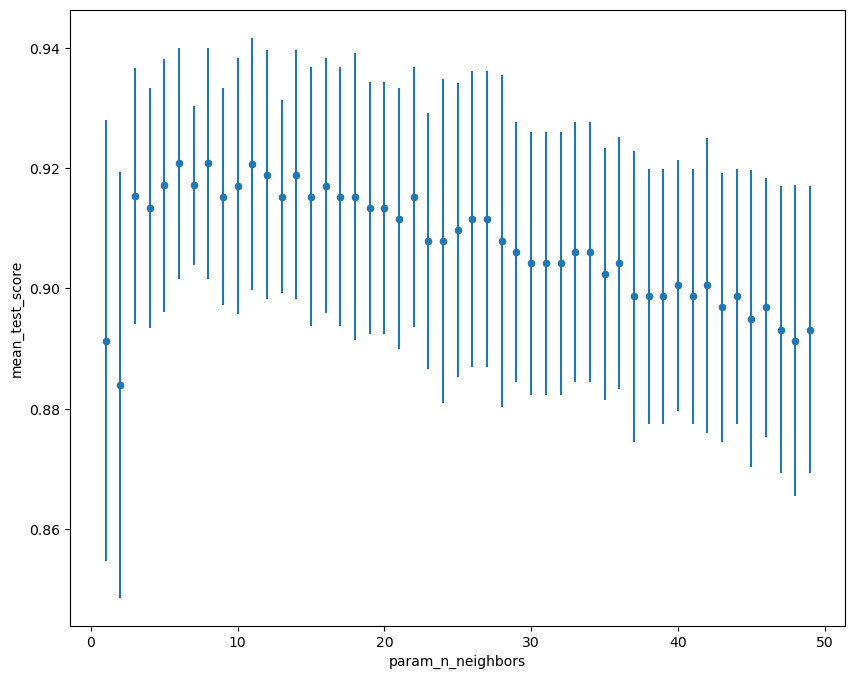

In [22]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score", figsize=(10,8))

## n_neighbours = 8 yields best score (>0.92)

# Build KNN

In [27]:
knn = KNeighborsClassifier(n_neighbors=8) 

In [29]:
knn.fit(X_train, y_train) #train model on training set

KNeighborsClassifier(n_neighbors=8)

In [31]:
y_pred = knn.predict(X_test) #make predictions

# Model Evaluation

In [34]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

Accuracy: 0.927038626609442
Confusion Matrix:
[[ 65  13]
 [  4 151]]
Classification Report:
              precision    recall  f1-score   support

   OffTissue       0.94      0.83      0.88        78
    OnTissue       0.92      0.97      0.95       155

    accuracy                           0.93       233
   macro avg       0.93      0.90      0.92       233
weighted avg       0.93      0.93      0.93       233

